# Regressão Linear Simples

## Gradiente descendente

Neste documento usarei gradiente descendente como estratégia de otimização para regressão linear. O código abaixo é executado com uma base de dados (income.csv) contendo anos de escolaridade versus salário. Usarei, a princípio, a taxa de aprendizagem de 0.0001 e o número de iterações igual a 1000.

Percebe-se que, após 1000 iterações, o valor de **w0** (coeficiente linear) foi de -0.18234255376510086, o valor de **w1**(coeficiente angular) foi de 3.262182267596014 e o erro foi de 103.39842291729676. Inicialmente, para **w0** = **w1** = 0, o erro era de 2946.6344970460195.

In [7]:
from numpy import *

def compute_error_for_given_points(w0, w1, points):
    total_error = 0
    
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]        
        total_error += (y - (w1 * x + w0)) **2 
        
    return total_error / float(len(points))
        


def step_gradient(w0_current, w1_current, points, learning_rate):
    # gradient descent
    w0_gradient = 0
    w1_gradient = 0
    N = float(len(points))
    
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        w0_gradient += -(2/N) * (y - ((w1_current * x) + w0_current))
        w1_gradient += -(2/N) * x * (y - ((w1_current * x) + w0_current))
        
    new_w0 = w0_current - (learning_rate * w0_gradient)
    new_w1 = w1_current - (learning_rate * w1_gradient)
    return [new_w0, new_w1]
    

def gradient_descent_runner(points, starting_w0, starting_w1, learning_rate, num_iterations):
    w0 = starting_w0
    w1 = starting_w1
    
    for i in range(num_iterations):
        w0, w1 = step_gradient(w0, w1, array(points), learning_rate)
    return [w0, w1]
        

def run():
    points = genfromtxt('income.csv', delimiter=",")    
    learning_rate = 0.0001
    
    initial_w0 = 0
    initial_w1 = 0
    num_iterations = 1000
       
    print("Starting gradient descent at w0 = {0}, w1 = {1}, error = {2}".format(initial_w0, initial_w1, compute_error_for_given_points(initial_w0, initial_w1, points)))
    print("Running...")
    [w0, w1] = gradient_descent_runner(points, initial_w0, initial_w1, learning_rate, num_iterations)
    print("After {0} iterations w0 = {1}, w1 = {2}, error = {3}".format(num_iterations, w0, w1, compute_error_for_given_points(w0, w1, points)))
    

run()


Starting gradient descent at w0 = 0, w1 = 0, error = 2946.6344970460195
Running...
After 1000 iterations w0 = -0.18234255376510086, w1 = 3.262182267596014, error = 103.39842291729676


### RSS

Vamos agora imprimir o RSS (soma dos erros quadrados) a cada iteração do gradiente descendente. 
Para isso, definirei a função *compute_rss* que será chamara a cada iteração da função *gradient_descent_runner*.

Como é possível perceber, o valor do RSS cai a cada iteração, sendo essa queda maior nas primeiras iterações. Para facilitar a visualização, um gráfico com os valores do RSS foi plotado. O eixo x, que representa o número de iterações, é exibido em escala logarítmica, para que fique mais fácil de visualizar o valor do RSS decrescendo.
 

Starting gradient descent at w0 = 0, w1 = 0, error = 2946.6344970460195
Running...
RSS = 79447.14379878416 - ITERATION = 1
RSS = 71435.20777869043 - ITERATION = 2
RSS = 64264.53040961913 - ITERATION = 3
RSS = 57846.77849791643 - ITERATION = 4
RSS = 52102.89394397851 - ITERATION = 5
RSS = 46962.119845960995 - ITERATION = 6
RSS = 42361.12886379743 - ITERATION = 7
RSS = 38243.24310606869 - ITERATION = 8
RSS = 34557.73592971116 - ITERATION = 9
RSS = 31259.207051614892 - ITERATION = 10
RSS = 28307.023274273037 - ITERATION = 11
RSS = 25664.817935926396 - ITERATION = 12
RSS = 23300.042919058902 - ITERATION = 13
RSS = 21183.567698552353 - ITERATION = 14
RSS = 19289.320490278456 - ITERATION = 15
RSS = 17593.96707953032 - ITERATION = 16
RSS = 16076.623372863956 - ITERATION = 17
RSS = 14718.598132350142 - ITERATION = 18
RSS = 13503.162723046531 - ITERATION = 19
RSS = 12415.345037268555 - ITERATION = 20
RSS = 11441.745057065482 - ITERATION = 21
RSS = 10570.369782863547 - ITERATION = 22
RSS = 9790.

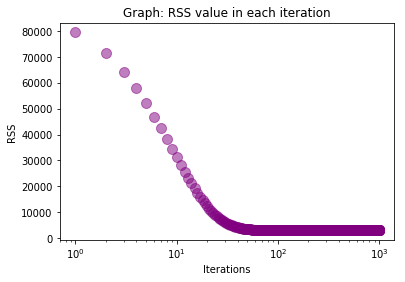

After 1000 iterations w0 = -0.18234255376510086, w1 = 3.262182267596014, error = 103.39842291729676


In [8]:
import matplotlib.pyplot as plt

def compute_rss(w0, w1, points):
    total_error = 0
    
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]        
        total_error += (y - (w1 * x + w0)) **2 
        
    return total_error
        
def plot_rss(rss_array):
    iterations_array = range(1, len(rss_array)+1)
    plt.scatter(iterations_array, rss_array, alpha=0.5, s=100, c="purple")
    plt.title('Graph: RSS value in each iteration')
    plt.xlabel("Iterations")
    plt.ylabel("RSS")
    plt.xscale('log')
    plt.show()

def gradient_descent_runner(points, starting_w0, starting_w1, learning_rate, num_iterations):
    w0= starting_w0
    w1 = starting_w1
    rss_array = []
    
    for i in range(num_iterations):
        w0, w1 = step_gradient(w0, w1, array(points), learning_rate)
        
        rss_current = compute_rss(w0, w1, points)
        rss_array.append(rss_current)        
        print('RSS = {0} - ITERATION = {1}'.format(rss_current, i+1))
    
    plot_rss(rss_array)   
    
    return [w0, w1]

run()

## Variar número de iterações e taxa de aprendizado

A seguir, irei mudar as variáveis **num_iterations** e **learning_rate** até que os valores de **w0** e **w1** se aproximem de -39 e 5, respectivamente.

Para isso, irei modificar o loop da função *gradient_descent_runner*. No lugar do *for*, colocarei um *while* até que os valores de **w0** e **w1** se aproximem do desejado. Assim, a única preocupação fica sendo variar a taxa de aprendizado (variável **learning_rate**). 

Após variar a taxa de aprendizado entre 0.0001 e 0.004, percebi duas coisas: 1) No intervalo de 0.0001 até 0.003 (à medida que esse valor aumenta), o número de iterações até que o algoritmo convirja diminui. Isso é óbvio, porque o algoritmo está aprendendo mais rápido. 2) Também percebi que, aparentemente, o valor 0.003 é ótimo (utilizando essa quantidade de casas decimais) nesse caso. Isso porque se o valor for maior ou igual a 0.004, o algoritmo erra e retorna valores *nan*.

Então, como é possível perceber pela saída, os valores necessários para que **w0** se aproxime de -39 (w0 = -39.00012177355754) e **w1** se aproxime de 5 (w1 = 5.57292537447843) são: **num_iterations = 15724** e **leaning_rate = 0.003**. 

In [9]:
def gradient_descent_runner(points, starting_w0, starting_w1, learning_rate):
    w0 = starting_w0
    w1 = starting_w1
    
    iteration = 0;
    while (not (w0 > -40 and w0 < -39)) or (not (w1 > 5 and w1 < 6)):    
        
        w0, w1 = step_gradient(w0, w1, array(points), learning_rate)
        
        iteration += 1
        #print('w0 = {0}, w1 = {1}, iteration = {2}'.format(w0, w1, iteration))        
            
    print('After {0} iterations, with leaning rate = {1}: w0 = {2}, w1 = {3}'.format(iteration, learning_rate, w0, w1))
    return [w0, w1]
        
def run():
    points = genfromtxt('income.csv', delimiter=",")
    #hyper parameters
    learning_rate = 0.003
    
    #y = mx + w0 (slope formula)
    initial_w0 = 0
    initial_w1 = 0  
    
    [w0, w1] = gradient_descent_runner(points, initial_w0, initial_w1, learning_rate)
       

run()

After 15724 iterations, with leaning rate = 0.003: w0 = -39.00012177355754, w1 = 5.57292537447843


## Gradiente como critério de parada

Agora, vamos utilizar o gradiente como critério de parada. Para isso, mudarei a condição do *while* da função *gradient_descent_runner*. 

Para usar o gradiente no *while*, utilizei a raiz quadrada da soma dos quadrados das variáveis **w0_gradient** e **w1_gradient**. Esse valor deve ser menor que a tolerância definida para que o algoritmo convirja.

Para que os valores de **w0** e **w1** ficassem próximos aos valores encontrados no tópico anterior, a tolerância definida (variável **tolerance**) foi de **0.04**.

Um gráfico com os valores do gradiente vs. o número de iterações é exibido. É possível perceber melhor que o gradiente está decrescendo porque o eixo x, que representa o número de iterações, está em escala logarítmica.


After 15938 iterations, w0 = -39.026550442698195, w1 = 5.574498619168578: Gradient = 0.03999838727484985 and Tolerance = 0.04


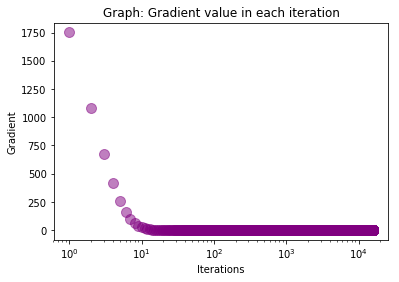

Execution Time: 1.15293550491333 seconds


In [10]:
import time

def step_gradient(w0_current, w1_current, points, learning_rate):
    #gradient descent
    w0_gradient = 0
    w1_gradient = 0
    N = float(len(points))
        
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        w0_gradient += -(2/N) * (y - ((w1_current * x) + w0_current))
        w1_gradient += -(2/N) * x * (y - ((w1_current * x) + w0_current))
        
        
    new_w0 = w0_current - (learning_rate * w0_gradient)
    new_w1 = w1_current - (learning_rate * w1_gradient)
    
    
    return [new_w0, new_w1, w0_gradient, w1_gradient]

def plot_gradient(gradient_array):
    iterations_array = range(1, len(gradient_array)+1)
    plt.scatter(iterations_array, gradient_array, alpha=0.5, s=100, c="purple",)
    plt.title('Graph: Gradient value in each iteration')
    plt.xlabel("Iterations")
    plt.ylabel("Gradient")
    plt.xscale('log')
    plt.show()

def gradient_descent_runner(points, starting_w0, starting_w1, learning_rate, num_iterations, tolerance):
    w0 = starting_w0
    w1 = starting_w1
    w0_gradient = 0 
    w1_gradient = 0    
    gradient = None
    gradient_array = []
    
    iterations = 0;
    while gradient == None or gradient >= tolerance:
        
        w0, w1, w0_gradient, w1_gradient = step_gradient(w0, w1, array(points), learning_rate)                   
        
        gradient = math.sqrt(w0_gradient**2 + w1_gradient**2)
        gradient_array.append(gradient)
        iterations += 1
        #print('gradient = {0}, w0 = {1}, w1 = {2} - ITERATION {3}'.format(gradient, w0, w1, iterations))
        
    print('After {0} iterations, w0 = {1}, w1 = {2}: Gradient = {3} and Tolerance = {4}'.format(iterations, w0, w1, gradient, tolerance))
    
    plot_gradient(gradient_array)
    
    return [w0, w1]
        
    
def run():
    points = genfromtxt('income.csv', delimiter=",", )
    
    learning_rate = 0.003
    
    initial_w0 = 0
    initial_w1 = 0
    num_iterations = 1000
    tolerance = 0.04
       
    [w0, w1] = gradient_descent_runner(points, initial_w0, initial_w1, learning_rate, num_iterations, tolerance)
    

start_time = time.time()   
run()
print("Execution Time: {0} seconds".format(time.time() - start_time))

## Forma fechada de calcular os coeficientes de regressão

Defini uma nova função para o cálculo dos valores de **w0** e **w1**, a função *simple_reg*.
Essa função calcula os coeficientes de regressão linear de forma incremental.

Como é possível perceber, essa forma fechada de calcular os coeficientes mostrou-se bem mais rápida que a forma do algoritmo do tópico anterior (Ver saídas: **Execution Time:....**).

In [11]:
import time
from numpy import *
    
def simple_reg(points):
      
    tmp_x = 0
    tmp_y = 0
    N = len(points)
    
    for i in range(0, N):
        xi = points[i, 0]
        yi = points[i, 1]
        tmp_x += xi
        tmp_y += yi
        
    average_x = tmp_x / float(N)
    average_y = tmp_y / float(N)
    
    a = 0
    b = 0    
    for i in range(0, N):
        xi = points[i, 0]
        yi = points[i, 1]
        a += (xi - average_x) * (yi - average_y)
        b += (xi - average_x)**2
        
    w1 = a/b
    w0 = average_y - w1*average_x                   
        
    print('Simple regression: w0 = {0}, w1 = {1}'.format(w0, w1)) 
        

def run():
    points = genfromtxt('income.csv', delimiter=",")
    simple_reg(points)
    

start_time = time.time()   
run()
print("Execution Time: {0} seconds".format(time.time() - start_time))

Simple regression: w0 = -39.44625667909617, w1 = 5.599482874119919
Execution Time: 0.00099945068359375 seconds
